In [1]:
import os, sys
sys.path.append('../../')

import numpy as np
import matplotlib.pyplot as plt

import neurons

In [2]:
net = neurons.Network()

net.add(neurons.Sensory, 100, 'input')
net.add(neurons.adaptiveLIFrate, 10, 'neuron',
    v_rest=-70,
    v_thres=-55,
    R=20,
    tau_s=10,
    gamma=0.5,
    theta=0.5
)
net.connect('input', 'neuron')

net.compile()

network successfully compiled.



In [3]:
# net.train = True

In [4]:
seconds = 10
dt = 0.001 # 1 ms


net.reset_history()
steps = int(seconds / dt)

for i in range(steps):
    
    if i*dt == 1:
        net.bundles['input'].outputs[:] = 0.8
        
    if i*dt == 4:
        net.bundles['input'].outputs[:] = 0
        
    if i*dt == 5:
        net.bundles['input'].outputs[:] = 0.5
        
    if i*dt == 8:
        net.bundles['input'].outputs[:] = 0
        
    net.step(dt)

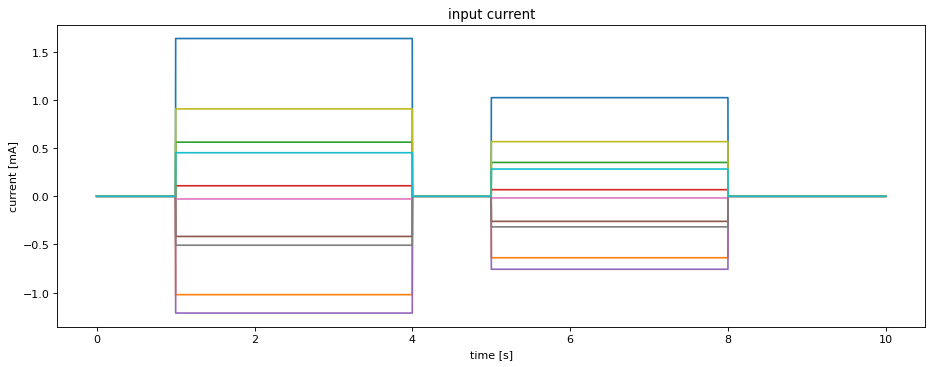

In [5]:
plt.figure(figsize=(14,5), dpi=80)
plt.title('input current')
plt.plot(np.arange(steps) * dt, net.history['neuron'].current)
plt.ylabel('current [mA]')
plt.xlabel('time [s]')
plt.show()

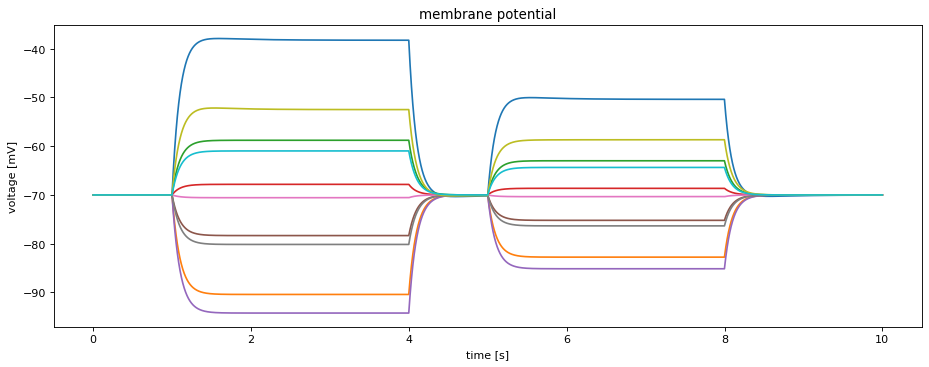

In [6]:
plt.figure(figsize=(14,5), dpi=80)
plt.title('membrane potential')
plt.plot(np.arange(steps) * dt, net.history['neuron'].voltage)
plt.ylabel('voltage [mV]')
plt.xlabel('time [s]')
plt.show()

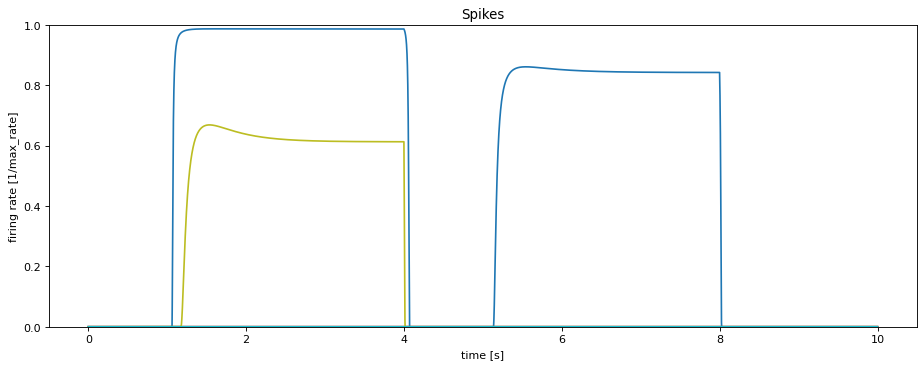

In [7]:
plt.figure(figsize=(14,5), dpi=80)
plt.title('Spikes')
plt.plot(np.arange(steps) * dt, net.history['neuron'].outputs)
plt.ylabel('firing rate [1/max_rate]')
plt.xlabel('time [s]')
plt.ylim(0,1)
plt.show()